In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
from dolfin import *
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import leggauss
import numpy as np
from ufl import tanh
import solver2D as s2

## Mesh creation

In [32]:
mesh = BoxMesh(Point(-1, -1, -1), Point(1, 1, 1), 10, 10, 10)
V = FunctionSpace(mesh, "CG", 1)

## Test Case


In [33]:
m0 = 1e-3
dt = 0.5
T = 151
save_interval = 2
times = []#[0,7/dt,14/dt,21/dt,28/dt]
doses = []#10*np.ones_like(times)
V = FunctionSpace(mesh,"P",2)
n0 = Expression("m0/(pow(2*pi,0.5)*sigma)*exp(-pow(x[2]-s0,2)/(2*sigma*sigma) - x[0]*x[0]/(2*sigma_x*sigma_x) - x[1]*x[1]/(2*sigma_x*sigma_x))",
                m0 = m0,s0 = 0.5,sigma=sqrt(0.02),sigma_x = sqrt(0.002),degree=2)
n0 = interpolate(n0,V)
c0 = interpolate(Constant(1.0), V)
path_sol = "solutions/testV"

solver = s2.Solver2D(mesh, V, n0, c0, dt, T, save_interval, times, doses, path_sol)
solver.solve()
        

time=0: 


Solving linear variational problem.
[-4.37614189e-07 -4.37619015e-07 -4.37642872e-07 ... -4.32235106e-07
 -4.32027644e-07 -4.32026618e-07]
[1. 1. 1. ... 1. 1. 1.]
iter=1: norm=1
Solving linear variational problem.
[-4.37979511e-07 -4.37984336e-07 -4.38008242e-07 ... -4.32592886e-07
 -4.32385119e-07 -4.32384094e-07]
[-4.37614189e-07 -4.37619015e-07 -4.37642872e-07 ... -4.32235106e-07
 -4.32027644e-07 -4.32026618e-07]
iter=2: norm=0.000830594
Solving linear variational problem.
time=0.5: 
Solving linear variational problem.
[-3.71802498e-07 -3.71807324e-07 -3.71831200e-07 ... -3.66420384e-07
 -3.66212794e-07 -3.66211769e-07]
[-4.37979511e-07 -4.37984336e-07 -4.38008242e-07 ... -4.32592886e-07
 -4.32385119e-07 -4.32384094e-07]
iter=1: norm=0.152753
Solving linear variational problem.
[-3.71802491e-07 -3.71807317e-07 -3.71831193e-07 ... -3.66420377e-07
 -3.66212788e-07 -3.66211762e-07]
[-3.71802498e-07 -3.71807324e-07 -3.71831200e-07 ... -3.66420384e-07
 -3.66212794e-07 -3.66211769e-07]
it

([array([1.65120690e-202, 2.11831983e-221, 5.77856958e-145, ...,
         2.01513834e-163, 2.48468276e-186, 1.76455806e-189]),
  array([-5.63789449e-14,  1.34714002e-13, -6.32956949e-13, ...,
          3.05897637e-16,  5.77216228e-18,  1.06891863e-16]),
  array([ 2.10145861e-14, -1.84867312e-13, -3.00420941e-13, ...,
         -2.24698233e-17, -1.47145471e-18, -1.33751201e-17]),
  array([ 7.95997684e-15, -4.08045005e-14, -2.17929212e-14, ...,
          1.53890660e-18,  2.79047494e-19, -3.53192991e-19]),
  array([-2.92189435e-15,  1.97266726e-14,  1.97399734e-14, ...,
         -4.57057157e-18, -2.28129039e-19,  1.16736505e-19]),
  array([-1.99528913e-15,  1.73406444e-15, -1.26230641e-15, ...,
          6.83623137e-19, -6.40046369e-20,  4.77679905e-19]),
  array([-5.03065442e-16, -1.80599576e-15, -2.88053972e-15, ...,
          4.51327606e-19,  5.79105414e-20, -9.12320610e-21]),
  array([-9.32296512e-17, -7.48134876e-16, -1.04299478e-15, ...,
         -2.77880628e-20,  3.08909832e-20, -9.

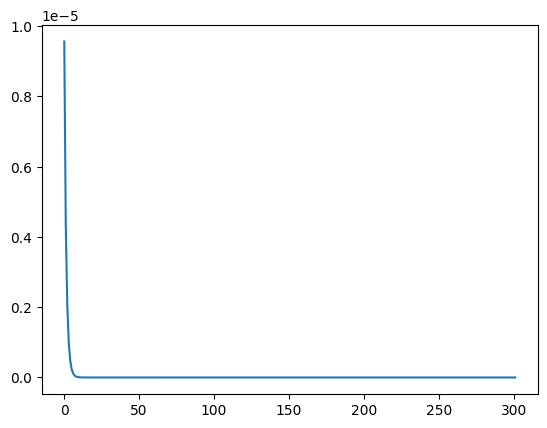

In [34]:
mass = np.load('solutions/testV/mass.npy')
plt.plot(mass)